## MIE1624 Assignment 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
df = pd.read_csv('/Users/angelahsu/Desktop/clean_kaggle_data.csv')


/Users/angelahsu/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (207) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Problem 1

### Boxplot of age and salary

The following graph shows that the median of salary gradually increases as the age moves from 18 to 59 years and decreases as the age moves from 60 to over 70 years. Moreover, all distribution skewed to the right, and the number of outliers decreases as the age moves from 18 to over 70 years. In the sample, the highest salary $500,000 was achieved in all age groups except people who aged 60 years and older. Thus, it can be concluded that age ranging from 18 to 59 years is positively correlated with salary and age ranging from 60 to over 70 years is negatively correlated with salary.

Text(0, 0.5, 'Salary')

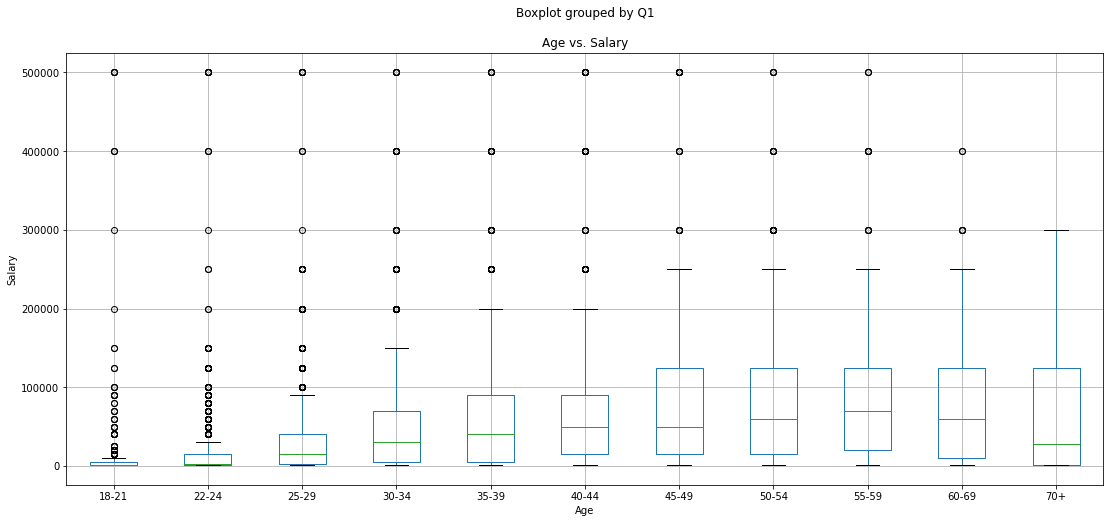

In [2]:
salary = df['Q24']
age = df['Q1']
df.boxplot(by='Q1', column=['Q24'], grid=True, figsize=(18,8))
plt.title('Age vs. Salary')
plt.xlabel('Age')
plt.ylabel('Salary')


### Boxplot of education and salary

The following graph shows that the median of salary is positively correlated with education level. More specifically, the median of salary for Doctoral degree is higher than that for Master's degree, while the median of salary for Master's degree is higher than that for Bachelor's degree. Surprisingly, the median of salary for professional degree is nearly the same as that for the group which has no formal education after high school. However, the former group has more outliers than the latter one, saying that educated people are more likely earning higher salary. Moreover, the highest salary 500,000 was achieved in all groups except people who have no formal education after high school or people who haven't earn Bachelor's degree. Therefore, it can be concluded that level of education is positively correlated with salary despite of some special case in which people have no Bachelor degree can perform well (salary >= $200,000).

Text(0, 0.5, 'Salary')

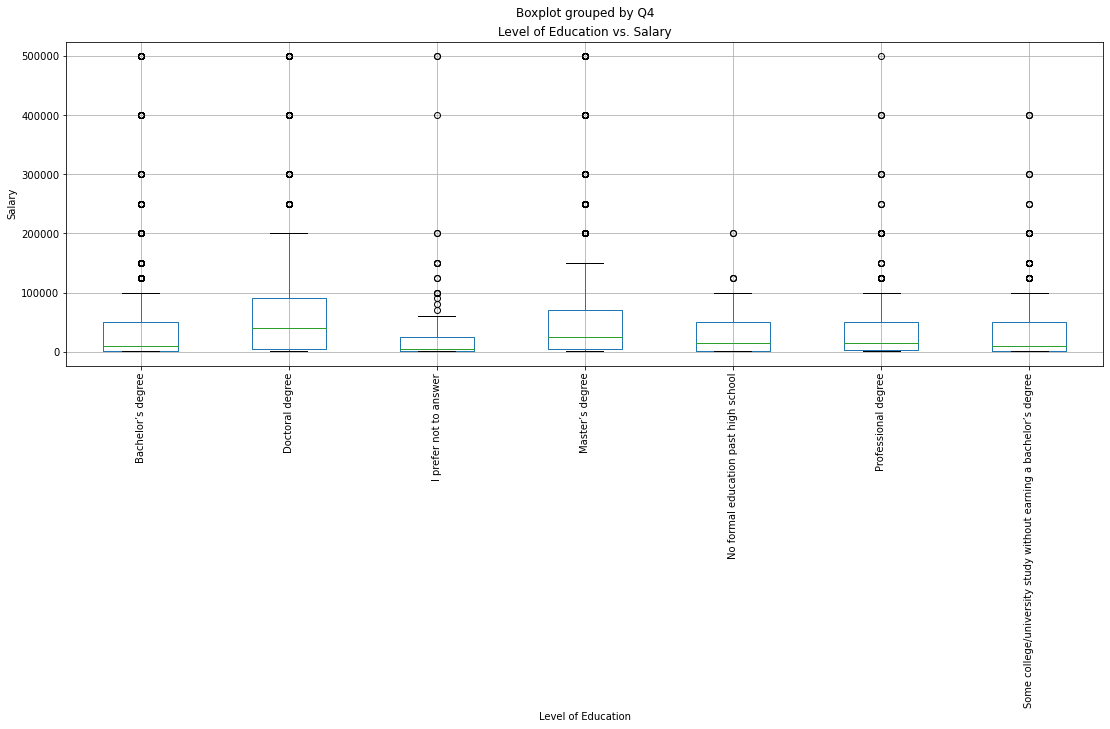

In [3]:
salary = df['Q24']
education = df['Q4']
df.boxplot(by='Q4', column=['Q24'], grid=True, figsize=(18,6), rot=90)
plt.title('Level of Education vs. Salary')
plt.xlabel('Level of Education')
plt.ylabel('Salary')

### Boxplot of country and salary

The following graph shows that the median of salary for US, Switzerland, Israel, and Australia are the highest while that for Nigeria, Pakistan, Kenya, and Egypt are the lowest. Thus, people in developed countries are more likely to earn higher salary, and people in developing countries tend to have lower salary. 

Text(0, 0.5, 'Salary')

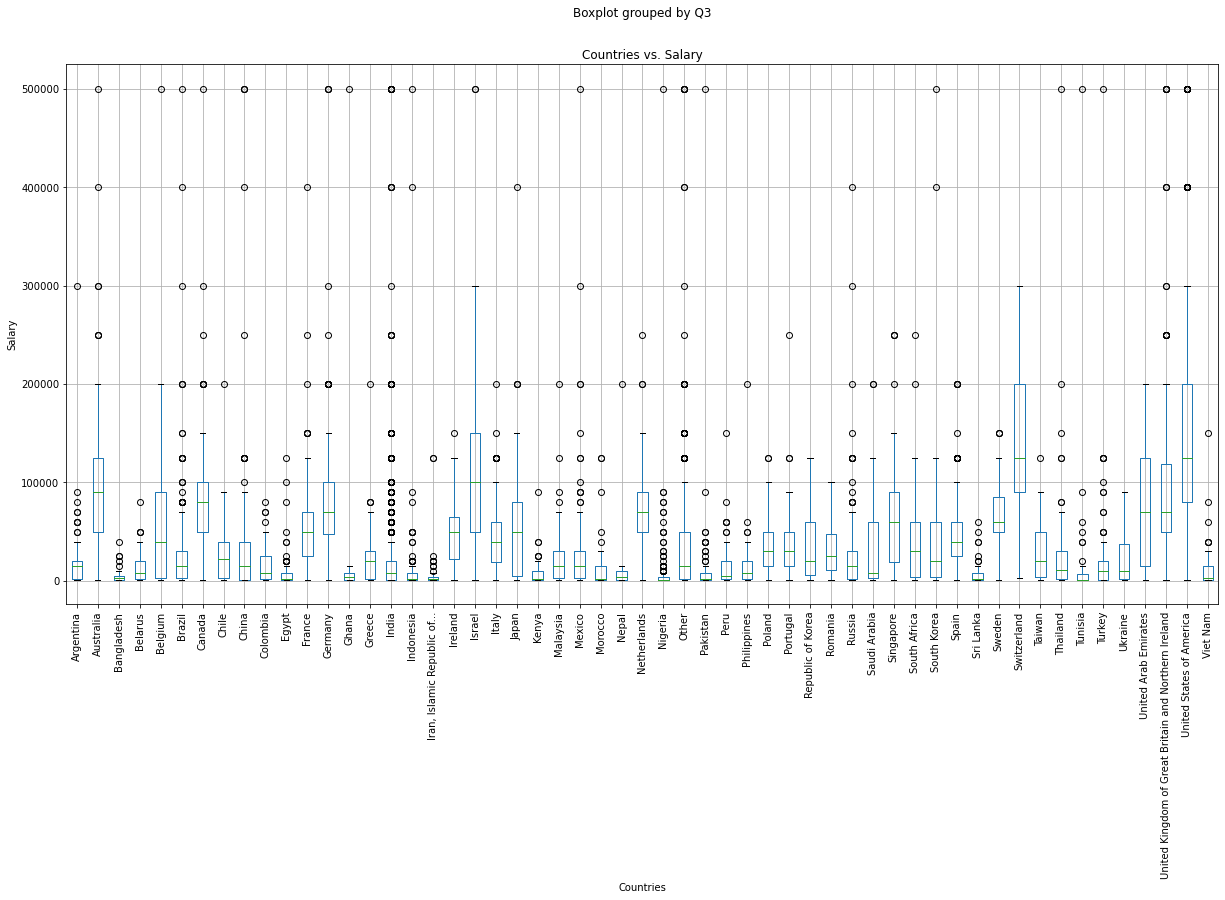

In [4]:
salary = df['Q24']
country = df['Q3']
df.boxplot(by='Q3', column=['Q24'], grid=True, figsize=(20,10), rot=90)
plt.title('Countries vs. Salary')
plt.xlabel('Countries')
plt.ylabel('Salary')

## Problem 2(a)

### Descriptive statistics for men's salary


There are 8872 men with average salary 50750 and standard deviation in salary 70,347. The minimum of salary is 1000 and the maximum of salary is 500,000. 1st quantile is 3000; median is 25,000; 3rd quantile is 70,000.

In [5]:
Man=df[df.Q2=='Man'] # Selecting the rows that contain men
Man['Q24'].describe() # Describe the salary column in the dataframe that contains only men

count      8872.000000
mean      50750.619928
std       70347.974812
min        1000.000000
25%        3000.000000
50%       25000.000000
75%       70000.000000
max      500000.000000
Name: Q24, dtype: float64

### Descriptive statistics for women's salary

There are 1683 women with average salary 36,417 and standard deviation in salary 59,442. The minimum of salary is 1000 and the maximum of salary is 500,000. 1st quantile is 1000; meidna is 7500; 3rd quantile is 50,000.

In [6]:
Woman=df[df.Q2=='Woman'] # Selecting the rows that contain women
Woman['Q24'].describe() # Describe the salary column in the dataframe that contains only women

count      1683.000000
mean      36417.112299
std       59442.716093
min        1000.000000
25%        1000.000000
50%        7500.000000
75%       50000.000000
max      500000.000000
Name: Q24, dtype: float64

## Problem 2(b)

As shown above, both the median and mean for women’s salary is lower than those for men’s salary. To determine whether there is a difference between the average salary of men and women, two-sample t-test with significance-level of 95% is performed. 

T-test is appropriate in this case since 

(1) the values of salary are independent with each other; 

(2) the sample is randomly sampled from the population; 

(3) the distribution of salary is normal due to large sample size; 

(4) the data values (salary) are continuous; 

(5) although two samples have unequal variances, this contraint is added to the code.

Two-sample t-test hypothesis:

Null hypothesis: Two group means are equal

Alternative hypothesis: Two group means are different

In [7]:
import scipy.stats as stats

# Men's salary has std 70347 while women's salary has std 59442, so they have unequal variances
stats.ttest_ind(Man['Q24'],Woman['Q24'],equal_var=False) 

Ttest_indResult(statistic=8.792916020018406, pvalue=2.5655984594105773e-18)

Since t-value is 8.79 and p-value is less than 5%, null hypothesis is rejected and it is 95% confident to conclude that the average salary of men is different from that of women. 

### Problem 2(c)

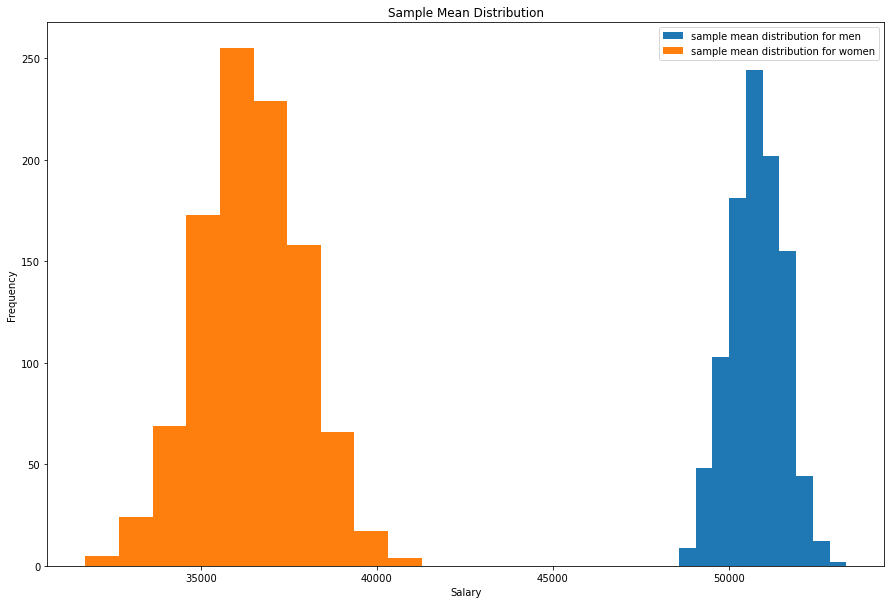

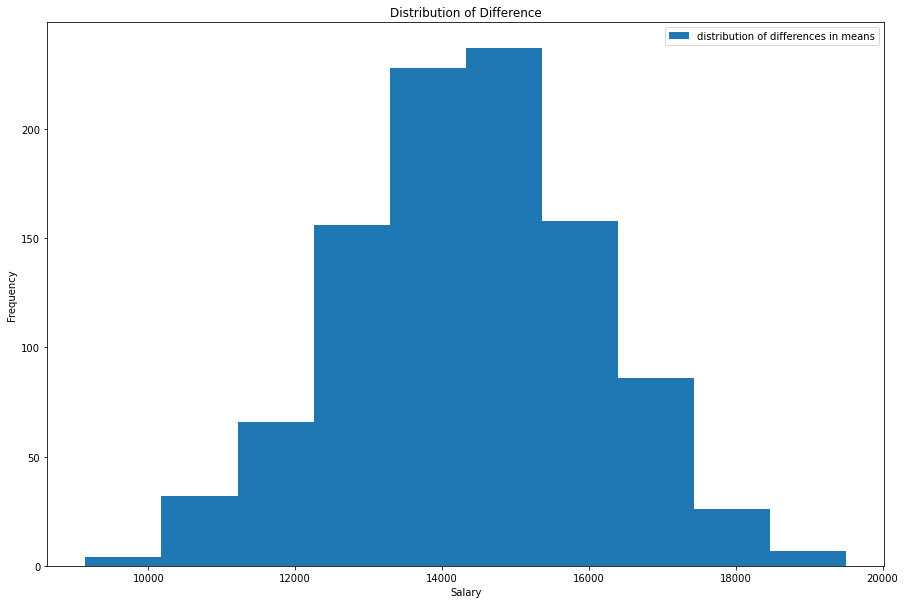

In [8]:
man_avg_salary = []
woman_avg_salary = []
diff_salary = []

for rep in range(1000):
    # Compute bootstrap sample by resampling with replacement
    bootstrap=df.sample(frac=1, replace=True)
    # Compute bootstrap sample mean for men's and women's salary
    man_salary=bootstrap[bootstrap['Q2']=='Man'].Q24.mean()
    woman_salary=bootstrap[bootstrap['Q2']=='Woman'].Q24.mean()
    # Store the values
    man_avg_salary.append(man_salary)
    woman_avg_salary.append(woman_salary)
    diff_salary.append(man_salary-woman_salary)

fig= plt.figure(figsize=(15,10)) 
plt.hist(np.array(man_avg_salary),label='sample mean distribution for men')
plt.hist(np.array(woman_avg_salary),label='sample mean distribution for women')
# fig= plt.figure(figsize=(15,10))
plt.legend()
plt.title('Sample Mean Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

fig= plt.figure(figsize=(15,10)) 
plt.hist(np.array(diff_salary),label='distribution of differences in means')
plt.legend()
plt.title('Distribution of Difference')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

The spread of women’s salary is a little larger than that of men’s salary; the range of women’s salary is a lot lower than that of men’s salary. 

The difference between men and women’s average salary is computed for 1000 bootstrapped samples and the distribution is shown as following. Salary of men is higher than that of women in the range from about 8,000 to nearly 20,000.

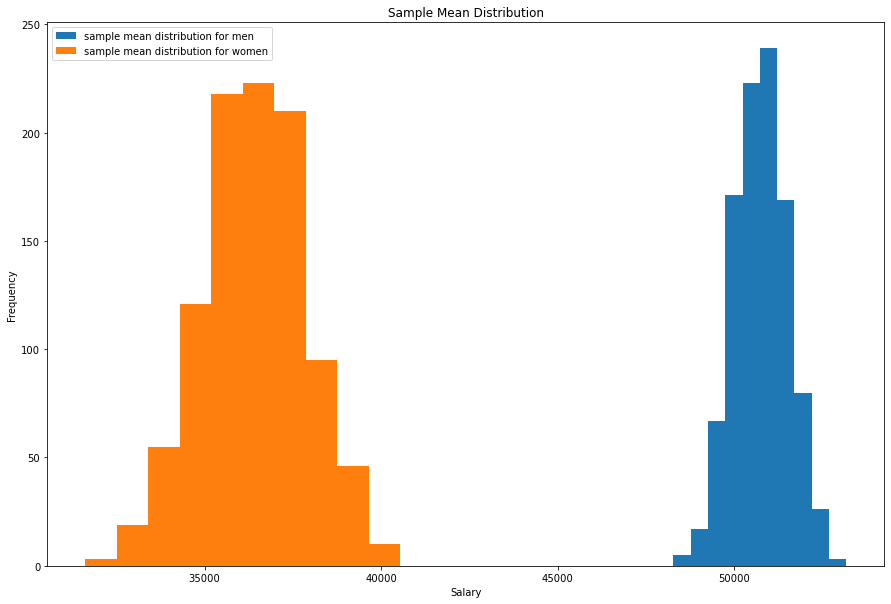

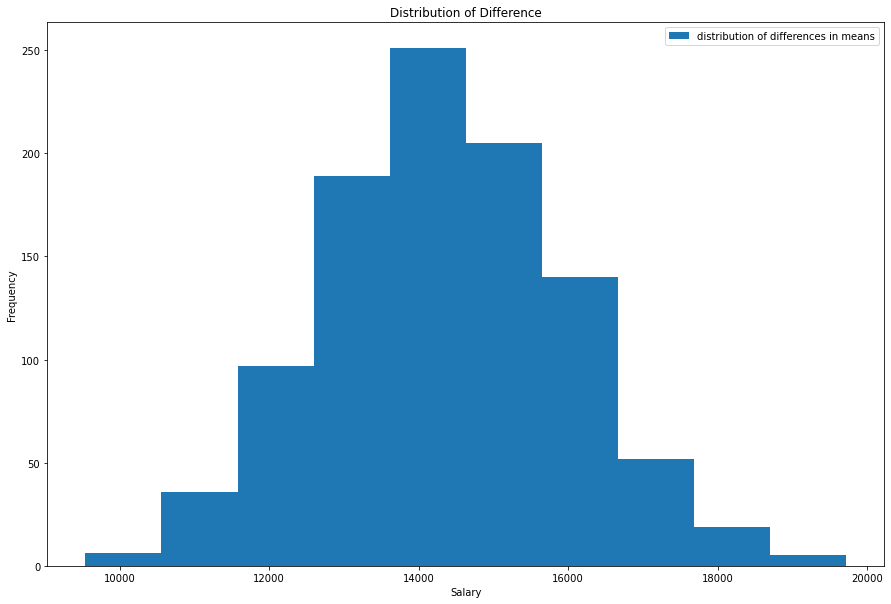

In [9]:
man_avg_salary = []
woman_avg_salary = []
diff_salary = []

# Compute 1000 bootstrap samples
for rep in range(1000):
    # Compute bootstrap sample by resampling with replacement and with same size 
    man_salary=np.random.choice(Man['Q24'], size=8872,replace=True).mean() 
    woman_salary=np.random.choice(Woman['Q24'], size=1683,replace=True).mean()
    # Store the values
    man_avg_salary.append(man_salary)
    woman_avg_salary.append(woman_salary)
    diff_salary.append(man_salary-woman_salary)

fig= plt.figure(figsize=(15,10)) 
plt.hist(np.array(man_avg_salary),label='sample mean distribution for men')
plt.hist(np.array(woman_avg_salary),label='sample mean distribution for women')
plt.legend()
plt.title('Sample Mean Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

fig= plt.figure(figsize=(15,10)) 
plt.hist(np.array(diff_salary),label='distribution of differences in means')
plt.legend()
plt.title('Distribution of Difference')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

## Problem 2(d)

### Two bootstrap sample t-test with significance level of 95%

In [10]:
stats.ttest_ind(man_avg_salary,woman_avg_salary,equal_var=False)

Ttest_indResult(statistic=277.4336458430101, pvalue=0.0)

Since P-value is smaller than 0.05, we are 95% confident to conclude that the average salary of men is different from that of women.

## Problem 3(a)

### Descriptive statistics of the salary for Bachelor's degree 

There are 3013 Bachelor’s degree earning average salary 35,732 with standard deviation 60,247. The median of salary is 10,000; 1st quantile is 1000; 3rd quantile is 50,000.

In [11]:
Bachelor = df[df['Q4'].str.contains('Bachelor')]
Bachelor['Q24'].describe()

count      3013.000000
mean      35732.824427
std       60247.753546
min        1000.000000
25%        1000.000000
50%       10000.000000
75%       50000.000000
max      500000.000000
Name: Q24, dtype: float64

### Descriptive statistics of the salary for Doctoral's degree 

There are 1718 Doctoral degree earning average salary 68,719 with standard deviation 85,403. The median of salary is 40,000; 1st quantile is 5,000; 3rd quantile is 90,000.

In [12]:
Doc = df[df['Q4'].str.contains('Doctoral')]
Doc['Q24'].describe()

count      1718.000000
mean      68719.441211
std       85403.650394
min        1000.000000
25%        5000.000000
50%       40000.000000
75%       90000.000000
max      500000.000000
Name: Q24, dtype: float64

### Descriptive statistics of the salary for Master's degree 

There are 4879 Master’s degree earning average salary 52,120 with standard deviation 67,681. The median of salary is 25,000; 1st quantile is 4,000; 3rd quantile is 70,000.

In [13]:
Master = df[df['Q4'].str.contains('Master')]
Master['Q24'].describe()

count      4879.000000
mean      52120.106579
std       67681.571528
min        1000.000000
25%        4000.000000
50%       25000.000000
75%       70000.000000
max      500000.000000
Name: Q24, dtype: float64

## Problem 3(b)

As shown above, Bachelor’s degree has the lowest mean and median in salary while Doctoral degree has the highest mean and median in salary. ANOVA is conducted to compare the means of salary for Bachelor's, Doctoral's, and Master's degree. ANOVA is a useful and economical method of parametric testing since it can analyze more than 2 groups of data and can also analyze multidimensional data. However, it requires strict assumption and may require post-ANOVA t-test for further testing.

In this assignment, One-way ANOVA is used because only one categorical variable (salary) is considered. 

There are five assumptions: 

(1) samples are drawn from normal distribution of the population; 

(2) dependent variable is expressed in interval or ratio; 

(3) independence of samples; 

(4) more than two groups of data; 

(5) homogeneity of variance. 

ANOVA hypothesis:

Null hypothesis (H0) is the equity in all population means.

Alternative hypothesis (Ha) is a difference in at least one mean.


### ANOVA comparing means of salary for Bachelor's, Doctoral's, and Master's degree

In [14]:
from scipy.stats import f_oneway

F, p = f_oneway(Bachelor['Q24'],Doc['Q24'],Master['Q24'])
print('ANOVA result: F =', F, ' p =', p)

ANOVA result: F = 129.7560112960932  p = 2.4852074227874282e-56


Since F-value is 129 and p-value is less than 5%, null hypothesis is rejected and the differences between group means are statistically significant. 

## Problem 3(c)

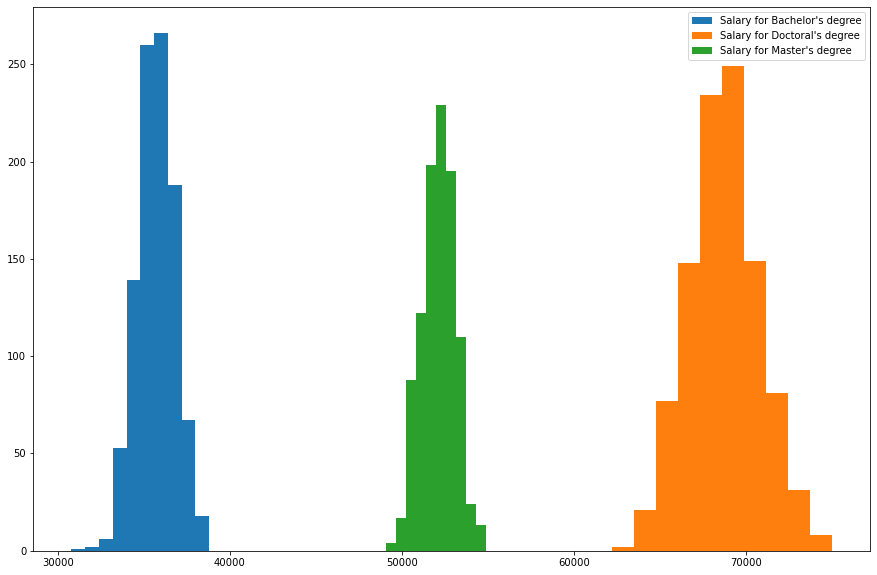

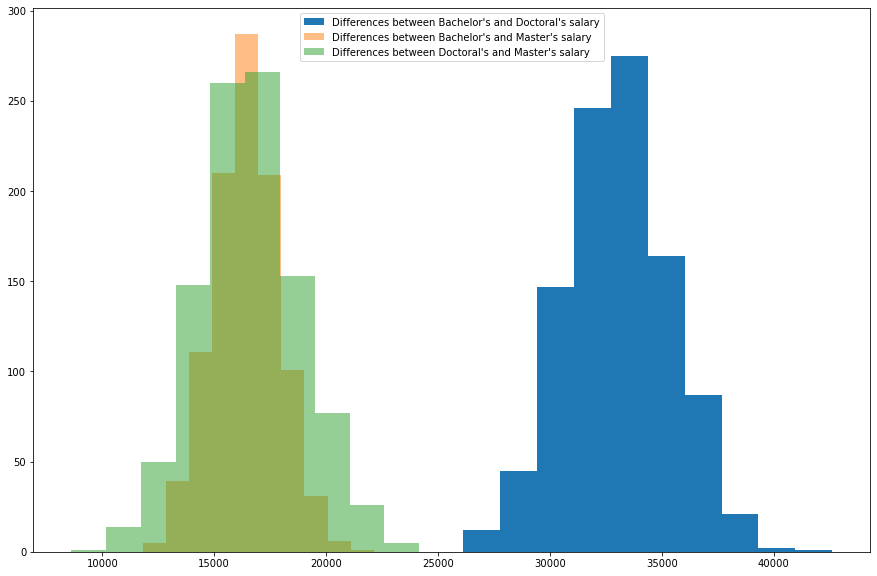

In [18]:
Bac_avg_salary = []
Doc_avg_salary = []
Mas_avg_salary = []

Doc_Bac_diff = []
Mas_Bac_diff = []
Doc_Mas_diff = []

for rep in range(1000):
    # Compute bootstrap sample by resampling with replacement
    bootstrap=df.sample(frac=1, replace=True)
    # Compute bootstrap sample mean for Bachlor's, Doctoral's, and Master's salary
    Bac_salary=bootstrap[bootstrap['Q4'].str.contains("Bachelor")].Q24.mean()
    Doc_salary=bootstrap[bootstrap['Q4'].str.contains("Doctoral")].Q24.mean()
    Mas_salary=bootstrap[bootstrap['Q4'].str.contains("Master")].Q24.mean()
    # Store the values
    Bac_avg_salary.append(Bac_salary)
    Doc_avg_salary.append(Doc_salary)
    Mas_avg_salary.append(Mas_salary)
    Doc_Bac_diff.append(Doc_salary-Bac_salary)
    Mas_Bac_diff.append(Mas_salary-Bac_salary)
    Doc_Mas_diff.append(Doc_salary-Mas_salary)
    
# Plot for sample mean for three groups
fig= plt.figure(figsize=(15,10)) 
plt.hist(np.array(Bac_avg_salary),label="Salary for Bachelor's degree")
plt.hist(np.array(Doc_avg_salary),label="Salary for Doctoral's degree")
plt.hist(np.array(Mas_avg_salary),label="Salary for Master's degree")
plt.legend()
plt.show()
# Plot for difference in sample mean for three groups
fig= plt.figure(figsize=(15,10)) 
plt.hist(np.array(Doc_Bac_diff),label="Differences between Bachelor's and Doctoral's salary")
plt.hist(np.array(Mas_Bac_diff),label="Differences between Bachelor's and Master's salary", alpha = 0.5)
plt.hist(np.array(Doc_Mas_diff),label="Differences between Doctoral's and Master's salary", alpha = 0.5)
plt.legend()
plt.show()

## Problem 3(d)

### ANOVA based on bootstrap samples

In [16]:
F, p = f_oneway(Bac_avg_salary,Doc_avg_salary,Mas_avg_salary)
print('ANOVA result: F =', F, ' p =', p)

ANOVA result: F = 127416.90131321909  p = 0.0


Since F-value is 129564 and p-value is less than 5%, null hypothesis is rejected and the differences between group means are statistically significant.